## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st


%matplotlib inline 
%matplotlib notebook

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="left")

# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
combined_df.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = combined_df.loc[combined_df.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
clean_data = combined_df[combined_df['Mouse ID'].isin(duplicate)==False]
clean_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
combined_df[combined_df['Mouse ID']!=duplicate[0]]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
clean_data.count()

Mouse ID              1880
Drug Regimen          1880
Sex                   1880
Age_months            1880
Weight (g)            1880
Timepoint             1880
Tumor Volume (mm3)    1880
Metastatic Sites      1880
dtype: int64

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

tumor_mean = combined_df.groupby(['Drug Regimen']).mean()["Tumor Volume (mm3)"]
tumor_median = combined_df.groupby(['Drug Regimen']).median()["Tumor Volume (mm3)"]
tumor_var = combined_df.groupby(['Drug Regimen']).var()["Tumor Volume (mm3)"]
tumor_std = combined_df.groupby(['Drug Regimen']).std()["Tumor Volume (mm3)"]
tumor_sem = combined_df.groupby(['Drug Regimen']).sem()["Tumor Volume (mm3)"]

summary_stats = pd.DataFrame({
    'Mean of Tumor Volume': tumor_mean,
    'Mediam of Tumor Volume': tumor_median,
    'Variance of Tumor Volume': tumor_var,
    'STD of Tumor Volume': tumor_std,
    'SEM of Tumor Volume': tumor_sem
})

summary_stats.round(3)


,Mean of Tumor Volume,Mediam of Tumor Volume,Variance of Tumor Volume,STD of Tumor Volume,SEM of Tumor Volume
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596
Placebo,54.034,52.289,61.168,7.821,0.581
Propriva,52.323,50.855,42.351,6.508,0.513
Ramicane,40.217,40.673,23.487,4.846,0.321
Stelasyn,54.233,52.432,59.451,7.710,0.573


In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line

summary_stats = combined_df.groupby('Drug Regimen')
stat_methods = summary_stats.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
stat_methods.round(3)

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596
Placebo,54.034,52.289,61.168,7.821,0.581
Propriva,52.323,50.855,42.351,6.508,0.513
Ramicane,40.217,40.673,23.487,4.846,0.321
Stelasyn,54.233,52.432,59.451,7.710,0.573


## Bar and Pie Charts

<IPython.core.display.Javascript object>


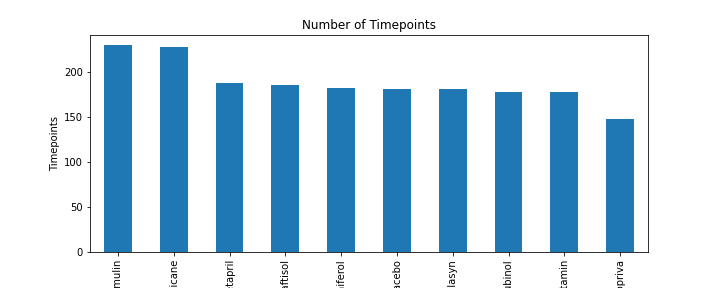

<AxesSubplot:title={'center':'Number of Timepoints'}, xlabel='Drug Regimen', ylabel='Timepoints'>

In [41]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
%matplotlib inline 
%matplotlib notebook
figure1, axl = plt.subplots(figsize=(10, 4))
axl.set_title('Number of Timepoints')
axl.set_ylabel('Timepoints')
axl.set_xlabel('Drug Regimen')
clean_data["Drug Regimen"].value_counts().plot(kind="bar")

<IPython.core.display.Javascript object>


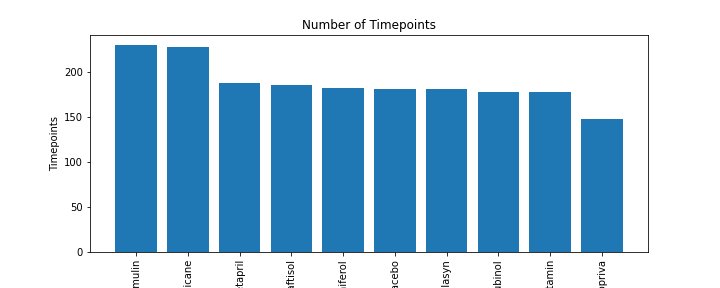

In [42]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot
%matplotlib inline 
%matplotlib notebook
figure1, axl = plt.subplots(figsize=(10, 4))
axl.set_title('Number of Timepoints')
axl.set_ylabel('Timepoints')
axl.set_xlabel('Drug Regimen')
plt.bar(list(clean_data["Drug Regimen"].value_counts().index),list(clean_data["Drug Regimen"].value_counts().values))
plt.xticks(rotation=90)
plt.show()


<IPython.core.display.Javascript object>


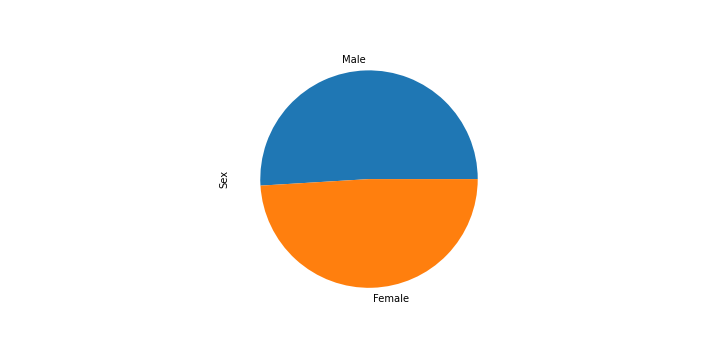

<AxesSubplot:ylabel='Sex'>

In [35]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
%matplotlib inline 
%matplotlib notebook
figure1, axl = plt.subplots(figsize=(10, 5))
clean_data["Sex"].value_counts().plot(kind="pie")


In [11]:
list(clean_data["Sex"].value_counts().values)

[958, 922]

<IPython.core.display.Javascript object>


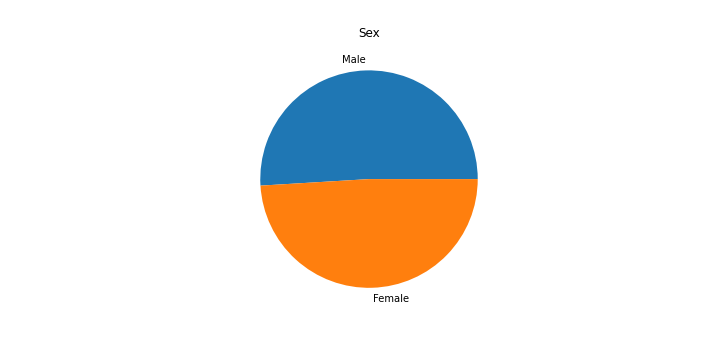

Text(0.5, 1.0, 'Sex')

In [79]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
%matplotlib inline 
%matplotlib notebook
figure1, axl = plt.subplots(figsize=(10, 5))
axl.set_title('Distribution amongst Gender')
plt.pie(list(clean_data["Sex"].value_counts().values),labels=list(clean_data["Sex"].value_counts().index))
plt.title("Sex")


## Quartiles, Outliers and Boxplots

In [25]:
max_df = clean_data.groupby(['Mouse ID'])['Timepoint'].max().reset_index()
max_merge_df = max_df.merge(clean_data, on=["Mouse ID","Timepoint"])


In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
treatments_to_plot = list(set(max_merge_df["Drug Regimen"].values))
final_tumor = []
for treatment in treatments_to_plot:
    treatment_df = max_merge_df[max_merge_df["Drug Regimen"]==treatment]
    final_tumor.append(list(treatment_df["Tumor Volume (mm3)"].values))

<IPython.core.display.Javascript object>


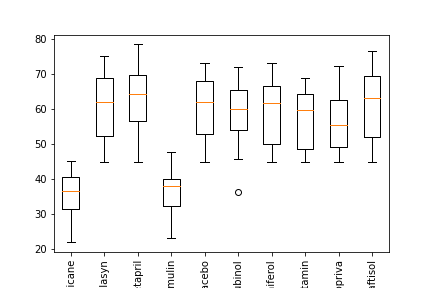

In [15]:
%matplotlib inline 
%matplotlib notebook
plt.boxplot(final_tumor,labels= treatments_to_plot)
plt.xticks(rotation=90)
plt.show()

In [16]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)

In [17]:

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds
capomulin_df = max_merge_df.loc[max_merge_df["Drug Regimen"] == "Capomulin"]
cap_time = capomulin_df.groupby('Mouse ID').max()['Timepoint']
cap_volume = pd.DataFrame(cap_time)
merge_cap = pd.merge(cap_volume, max_merge_df, on=("Mouse ID","Timepoint"),how="left")

cap_tumors = merge_cap["Tumor Volume (mm3)"] 
quartiles = cap_tumors.quantile([0.25,0.5,0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq
upper_outlier = upperq + (1.5*iqr)
lower_outlier = lowerq - (1.5*iqr)


In [18]:
Ramicane_df = max_merge_df.loc[max_merge_df["Drug Regimen"] == "Ramicane"]
ram_time = Ramicane_df.groupby('Mouse ID').max()['Timepoint']
ram_volume = pd.DataFrame(ram_time)
merge_ram = pd.merge(ram_volume, max_merge_df, on=("Mouse ID","Timepoint"),how="left")

ram_tumors = merge_ram["Tumor Volume (mm3)"] 
quartiles = ram_tumors.quantile([0.25,0.5,0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq
upper_outlier = upperq + (1.5*iqr)
lower_outlier = lowerq - (1.5*iqr)


In [19]:
Infubinol_df = max_merge_df.loc[max_merge_df["Drug Regimen"] == "Infubinol"]
inf_time = Infubinol_df.groupby('Mouse ID').max()['Timepoint']
inf_volume = pd.DataFrame(inf_time)
merge_inf = pd.merge(inf_volume, max_merge_df, on=("Mouse ID","Timepoint"),how="left")

inf_tumors = merge_inf["Tumor Volume (mm3)"] 
quartiles = inf_tumors.quantile([0.25,0.5,0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq
upper_outlier = upperq + (1.5*iqr)
lower_outlier = lowerq - (1.5*iqr)


In [20]:
Ceftamin_df = max_merge_df.loc[max_merge_df["Drug Regimen"] == "Ceftamin"]
cef_time = Ceftamin_df.groupby('Mouse ID').max()['Timepoint']
cef_volume = pd.DataFrame(cef_time)
merge_cef = pd.merge(cef_volume, max_merge_df, on=("Mouse ID","Timepoint"),how="left")

cef_tumors = merge_cef["Tumor Volume (mm3)"] 
quartiles = cef_tumors.quantile([0.25,0.5,0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq
upper_outlier = upperq + (1.5*iqr)
lower_outlier = lowerq - (1.5*iqr)


<IPython.core.display.Javascript object>


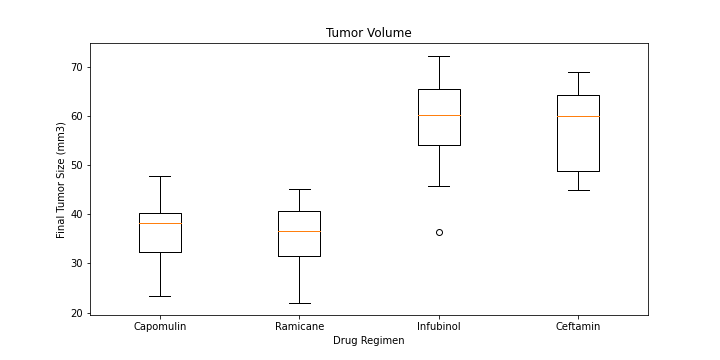

In [52]:
%matplotlib inline 
%matplotlib notebook
drugs = [cap_tumors,ram_tumors,inf_tumors,cef_tumors]
Drug_Regimen = ['Capomulin','Ramicane','Infubinol','Ceftamin']
figure1, axl = plt.subplots(figsize=(10, 5))
axl.set_title('Tumor Volume')
axl.set_ylabel('Final Tumor Size (mm3)')
axl.set_xlabel('Drug Regimen')
axl.boxplot(drugs, labels=Drug_Regimen, widths= 0.3)
plt.show()

## Line and Scatter Plots

In [50]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_df.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
19,b128,45,Capomulin,Female,9,22,38.982878,2
24,b742,45,Capomulin,Male,7,21,38.939633,0
61,f966,20,Capomulin,Male,16,17,30.485985,0
64,g288,45,Capomulin,Male,3,19,37.074024,1
66,g316,45,Capomulin,Female,22,22,40.159220,2


In [56]:
line_df = capomulin_df.loc[capomulin_df["Mouse ID"] == "b128"]
line_df.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
19,b128,45,Capomulin,Female,9,22,38.982878,2


<IPython.core.display.Javascript object>


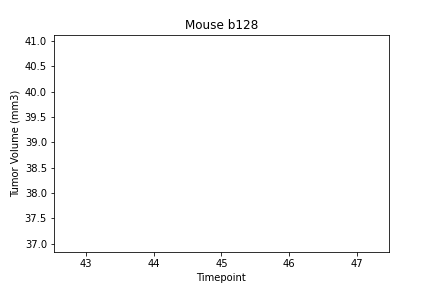

In [72]:
%matplotlib inline 
%matplotlib notebook
x_axis = capomulin_df.loc[capomulin_df["Mouse ID"] == "b128"]
x_axis = x_axis["Timepoint"]
y_axis = capomulin_df.loc[capomulin_df["Mouse ID"] == "b128"]
y_axis = y_axis["Tumor Volume (mm3)"]

plt.plot(x_axis, y_axis)
plt.title('Mouse b128')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

<IPython.core.display.Javascript object>


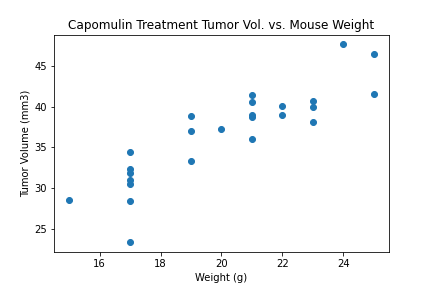

In [47]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
%matplotlib inline 
%matplotlib notebook
cap_weight = capomulin_df["Weight (g)"]
cap_volume = capomulin_df["Tumor Volume (mm3)"]
plt.scatter(cap_weight,cap_volume)
plt.title("Capomulin Treatment Tumor Vol. vs. Mouse Weight")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()


## Correlation and Regression

In [48]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
%matplotlib inline 
%matplotlib notebook
correlation = st.pearsonr(cap_weight,cap_volume)
x_val = cap_weight
y_val = cap_volume
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_val, y_val)
regress = slope * cap_weight + intercept
linear_eq = "y = " + str(round(slope,3)) + "x = " + str(round(intercept,3))
linear_eq , correlation




('y = 1.75x = 1.448', (0.8767060403658118, 9.084429088673274e-09))

<IPython.core.display.Javascript object>


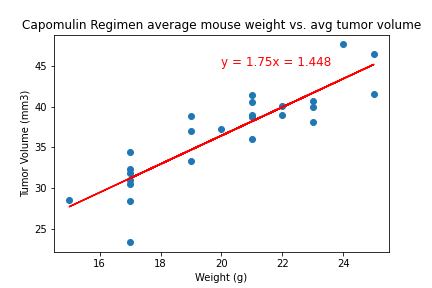

In [50]:
plt.plot(x_val, regress, color="r")
plt.scatter(x_val, y_val)
plt.text(20,45,linear_eq,fontsize=12,color="r")
plt.title("Capomulin Regimen average mouse weight vs. avg tumor volume")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()